Remove Outlier using Z score
Z score ->  z = (x - mean)/standard deviation

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
dataset = pd.read_csv("C:\\vs-code-folder\\ML_Practice\\Bengaluru_House_Data.csv")
dataset.head(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00


In [8]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


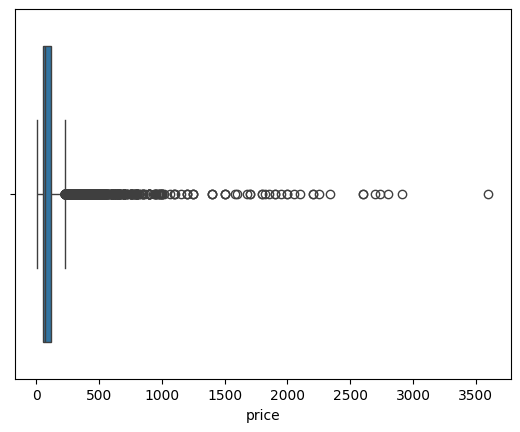

In [14]:
sns.boxplot(x= "price",data=dataset)
plt.show()

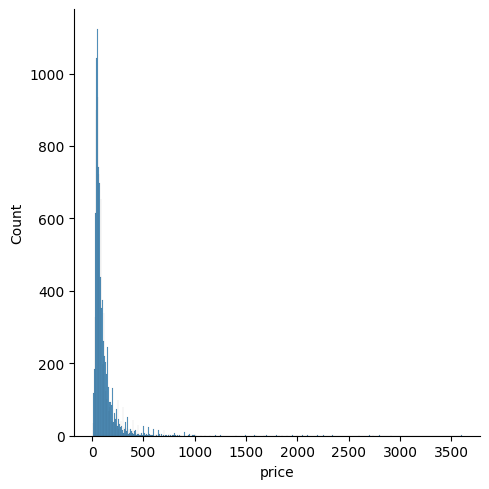

In [15]:
sns.displot(dataset["price"])
plt.show()

In [19]:
min_range = ((dataset["price"].mean()) - (3 * dataset["price"].std()))
max_range = ((dataset["price"].mean()) + (3 * dataset["price"].std()))
min_range,max_range

(-334.34939480752064, 559.4806478105236)

In [22]:
new_data = dataset[dataset["price"]<=max_range]

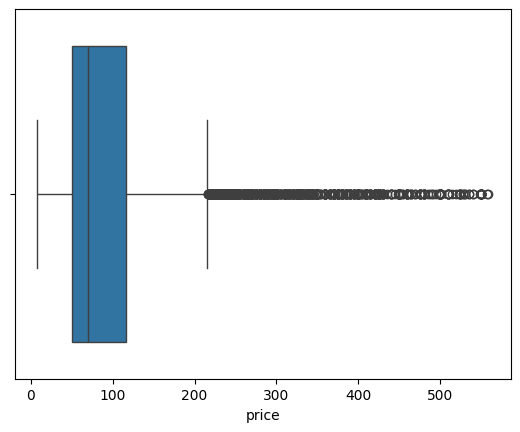

In [26]:
sns.boxplot(x="price",data=new_data)
plt.show()

In [28]:
z_score = (dataset["price"] - dataset["price"].mean())/dataset["price"].std()
z_score

0       -0.493353
1        0.049905
2       -0.339431
3       -0.117913
4       -0.413271
           ...   
13315    0.795013
13316    1.929457
13317   -0.352857
13318    2.520173
13319   -0.641502
Name: price, Length: 13320, dtype: float64

In [29]:
dataset["z_score"] = z_score
#making a new column in dataset of z_score

In [30]:
dataset.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413271


In [31]:
dataset.shape

(13320, 10)

In [33]:
dataset[dataset["z_score"]<3].shape

(13128, 10)